In [4]:
import pandas as pd
import numpy as np
import math
import random

%matplotlib inline

In [5]:
# 乱数シードを固定
random.seed(0)

In [6]:
# 乱数の係数
random_factor = 0.05

# サイクルあたりのステップ数(1周期)
steps_per_cycle = 50

# 生成するサイクル数(周期数)
number_of_cycles = 100

In [8]:
df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df.head(5)

,t
0,0
1,1
2,2
3,3
4,4


In [9]:
random.uniform(-1.0, +1.0) * random_factor

0.034442185152504814

<Axes: >

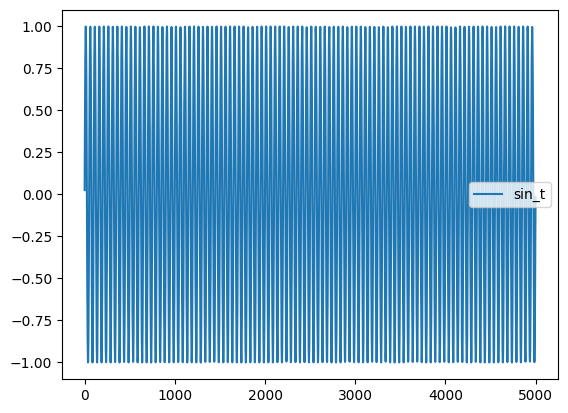

In [10]:
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
# sin(t) = sin(2pi/T)x
df[["sin_t"]].plot()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       5001 non-null   int64  
 1   sin_t   5001 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.3 KB


<Axes: >

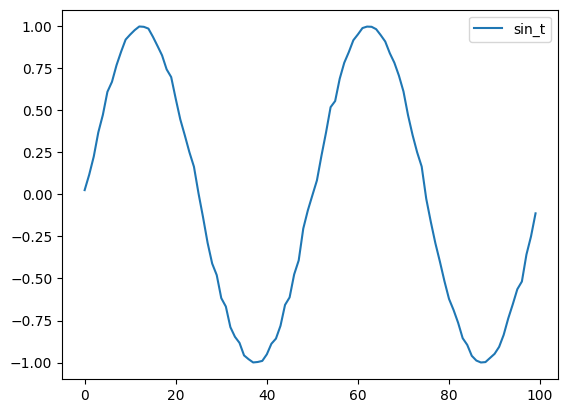

In [11]:
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [12]:
df["sin_t+1"] = df["sin_t"].shift(-1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   t        5001 non-null   int64  
 1   sin_t    5001 non-null   float64
 2   sin_t+1  5000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [14]:
df.head()

,t,sin_t,sin_t+1
0,0,0.025793,0.117449
1,1,0.117449,0.225269
2,2,0.225269,0.369173
3,3,0.369173,0.473401
4,4,0.473401,0.610505


In [30]:
df.tail

<bound method NDFrame.tail of          t         sin_t       sin_t+1
0        0  0.000000e+00  1.253332e-01
1        1  1.253332e-01  2.486899e-01
2        2  2.486899e-01  3.681246e-01
3        3  3.681246e-01  4.817537e-01
4        4  4.817537e-01  5.877853e-01
...    ...           ...           ...
4996  4996 -4.817537e-01 -3.681246e-01
4997  4997 -3.681246e-01 -2.486899e-01
4998  4998 -2.486899e-01 -1.253332e-01
4999  4999 -1.253332e-01  3.928773e-15
5000  5000  3.928773e-15           NaN

[5001 rows x 3 columns]>

In [15]:
df.dropna(inplace=True)
df.tail()

,t,sin_t,sin_t+1
4995,4995,-0.551502,-0.460640
4996,4996,-0.460640,-0.322940
4997,4997,-0.322940,-0.200619
4998,4998,-0.200619,-0.148042
4999,4999,-0.148042,-0.015450


<Axes: >

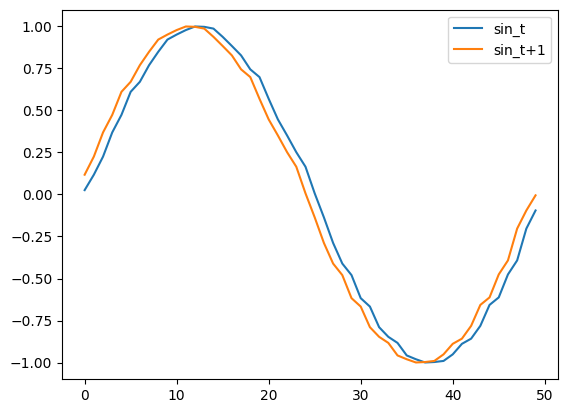

In [16]:
df[["sin_t", "sin_t+1"]].head(steps_per_cycle).plot()

In [17]:
df.info()
array = df[["sin_t", "sin_t+1"]].to_numpy()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   t        5000 non-null   int64  
 1   sin_t    5000 non-null   float64
 2   sin_t+1  5000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 156.2 KB


In [18]:
print(array)

[[ 0.02579258  0.11744915]
 [ 0.11744915  0.22526896]
 [ 0.22526896  0.36917262]
 ...
 [-0.32294043 -0.20061926]
 [-0.20061926 -0.14804184]
 [-0.14804184 -0.01545028]]


In [ ]:
np.save("noised.npy", array)